In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
def sigmoid(inputs):
  output = 1 / (1 + np.exp(-inputs))
  return output

def sigmoid1(inputs):                                                           # first derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)
  return temp2

def sigmoid2(inputs):                                                           # Second derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-2*temp1)
  return temp2

def sigmoid3(inputs):                                                           # Third derivative of sigmoid
  temp1 =  sigmoid(inputs)
  temp2 = temp1*(1-temp1)*(1-6*temp1+6*(temp1**2))
  return temp2


In [ ]:

def sigmoid_for_k(input,k):
  if k ==0:
    return sigmoid(input)
  elif k == 1:
    return sigmoid1(input)
  elif k ==2:
    return sigmoid2(input)
  elif k == 3:
    return sigmoid3(input)

In [ ]:
def layer1NN(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  lin_out = weights.T * inputs + biases.T                                        # output shape(n_neurons, input_size )
  nor_out = sigmoid(lin_out)
  net_out = nweights @ nor_out                                                  # output shape(1, input_size )
  # print(nweights.shape,nor_out.shape)
  return lin_out, net_out

In [ ]:
def der_NN_xj_k(p,inputs,k=0):
  # X = (x_1,x_2)
  # j = derivative w.r.t x_1 or x_2
  # k = kth derivative w.r.t x_j

  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  temp1 = weights**k
  temp2 = nweights * temp1                                                      # (1,n_neurons)
  lin_out = weights.T * inputs + biases.T

  temp3 = sigmoid_for_k(lin_out,k)
  temp4 = temp2 @ temp3
  # print(temp4.shape)
  return temp4

In [ ]:
def func2(p,x):
  _, N = layer1NN(p,x)
  # x.resize((len(inputs),1))
  # Define Function
  temp1 = np.exp(-x/5)
  temp2 = np.cos(x)
  temp3 = x*N/5
  # print(x.shape)
  return temp1*temp2 - temp3

In [ ]:
def error2(p,x):
  # x.resize((len(inputs),1))
  _, N = layer1NN(p,x)
  DN = der_NN_xj_k(p,x ,k=1)
  f = func2(p,x)
  temp1 = N + x*DN - f
  # print(N.shape,f.shape,(temp1).shape)
  return temp1@temp1.T

In [ ]:
inputs = np.linspace(0,2,1000)


n_inputs = 1
n_neurons =1000

p2 = np.random.randn(1,3*n_neurons)
# p = np.ones((1,3*n_neurons))
p2 =p2[0]


In [ ]:
# p2 = np.array([-0.15437338,  0.58579312, -1.61572732, -0.15446239, -1.18474361,
#        -0.64996335, -0.24764943,  1.03663806,  0.05327242,  0.59297783,
#        -0.56638843, -0.1607334 ,  0.88316942, -0.63397228,  0.57858561,
#         1.17635047,  0.56020881, -0.07833343,  0.45112328,  0.76563181,
#        -0.76698346, -0.33218902,  0.13582242,  0.56383427,  0.85543885,
#        -0.28589645,  0.83421216,  0.83860007,  0.11290705,  0.5726085 ,
#         0.21867827,  0.7458085 ,  0.499566  ,  0.41100393, -0.70565309,
#         0.44901989,  2.14078509,  0.08572929, -0.79928114, -0.33859977,
#         1.07794686,  1.10723428,  0.36501988,  1.25520137, -0.33427323])

## Using 'nelder-mead'

In [ ]:
error2(p2,inputs)

array([[18.22992355]])

In [ ]:
res2 = minimize(error2,p2, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})

<ipython-input-11-2024b0289b63>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res2 = minimize(error2,p2, method='nelder-mead',args=(inputs), options={'xatol': 1e-14, 'disp': True})


In [ ]:
error2(res2.x,inputs)

array([[4.12739138e-06]])

In [ ]:
def my_function2(x):
    temp1 = np.exp(-x / 5)
    temp2 = np.sin(x)


    result = temp1*temp2
    return result

In [ ]:
x_test = np.linspace(0,4,100)


_, N = layer1NN(res2.x,x_test)
yt = x_test*N
ya = my_function2(x_test)

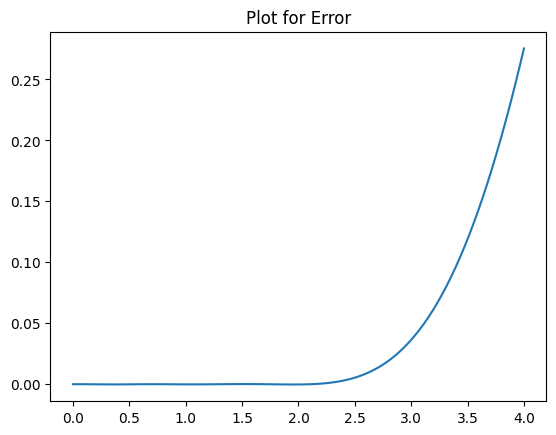

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya-yt).reshape(100,1))
plt.title('Plot for Error')
plt.show()

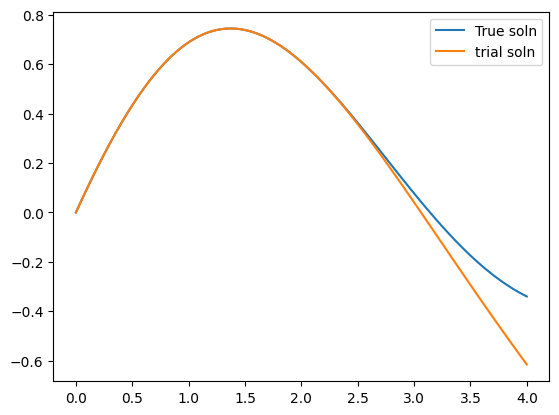

In [ ]:
plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( yt.reshape(100,1)),label = 'trial soln')
plt.legend()
plt.show()

## Using 'BFGS'

In [ ]:
def grad2(p,inputs):                                # Neural Network with 1 hidden unit
  # inputs.resize((len(inputs),1))
  weights = p[0:(len(p)//3)].reshape(1,len(p)//3)
  biases = p[(len(p)//3):2*(len(p)//3)].reshape(1,len(p)//3)
  nweights = p[2*(len(p)//3):3*(len(p)//3)].reshape(len(p)//3)

  output = weights.T * inputs + biases.T
  nor_out = sigmoid(output)
  out1 = nweights @ nor_out

  sig = sigmoid(output)
  sig1 = sigmoid1(output)
  sig2 = sigmoid2(output)



  DN_DX_V = weights*sig1.T
  DN_V = sig.T
  cons2 = 1+ inputs/5
  err_for_T_V = (inputs*DN_DX_V.T) + cons2*DN_V.T


  DN_DX_U = (nweights*weights)*sig2.T
  DN_U = nweights*sig1.T
  err_for_T_U = (inputs*DN_DX_U.T) + cons2*DN_U.T


  a = ((nweights*weights)*sig2.T)
  DN_DX_W = (a.T* inputs).T + nweights*sig1.T
  DN_W = ((nweights*sig1.T).T* inputs).T

  err_for_T_W = (inputs*DN_DX_W.T) + cons2*DN_W.T



  _, N = layer1NN(p,inputs)
  DN = der_NN_xj_k(p,inputs ,k=1)
  f = func2(p,inputs)
  err = (N + inputs*DN - f)



  DW = err @ err_for_T_W.T
  DU = err @ err_for_T_U.T
  DV = err @ err_for_T_V.T


  dp = np.array([DW,DU,DV])
  dp = dp.reshape(1,len(p))

  return 2*dp[0]

In [ ]:
res2 = minimize(error2, p2, method='BFGS', jac=grad2,args=(inputs), options={ 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 50
         Gradient evaluations: 50


In [ ]:
error2(p2,inputs)

array([[18.22992355]])

In [ ]:
error2(res2.x,inputs)

array([[1.01286682e-07]])

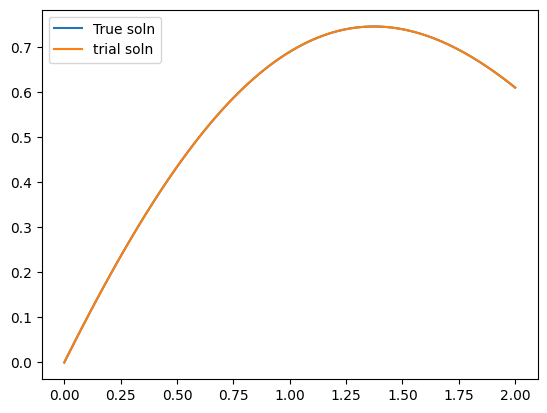

In [ ]:
x_test = np.linspace(0,2,100)


_, N = layer1NN(res2.x,x_test)
yt = x_test*N
ya = my_function2(x_test)

plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.legend()


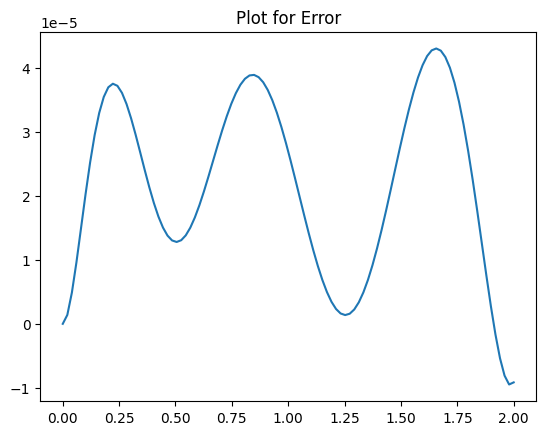

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_test,( ya-yt).reshape(100,1))
plt.title('Plot for Error')
plt.show()

##ADAM Optimiser


In [ ]:
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-7):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, parameters, gradients):
        if self.m is None:
            self.m = [np.zeros_like(param) for param in parameters]
            self.v = [np.zeros_like(param) for param in parameters]

        self.t += 1
        lr_t = self.learning_rate * np.sqrt(1 - self.beta2**self.t) / (1 - self.beta1**self.t)

        for i in range(len(parameters)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * gradients[i]
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (gradients[i] ** 2)
            parameters[i] -= lr_t * (self.m[i] / (np.sqrt(self.v[i]) + self.epsilon))
        # self.m = self.beta1 * self.m + (1 - self.beta1) * gradients
        # self.v = self.beta2 * self.v + (1 - self.beta2) * (gradients ** 2)
        # parameters -= lr_t * (self.m / (np.sqrt(self.v) + self.epsilon))

        return parameters


In [ ]:
inputs = np.linspace(0,2,1000)


n_inputs = 1
n_neurons =1000

p2 = np.random.randn(1,3*n_neurons)
# p = np.ones((1,3*n_neurons))
p2 =p2[0]

In [ ]:
# Instantiate the Adam optimizer with desired parameters
optimizer = AdamOptimizer(learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-7)


num_epochs = 100000
# During training loop, use the optimizer to update parameters
for epoch in range(num_epochs):
    # Forward pass
    # Compute gradients using backward pass

    # Update parameters using the optimizer
    gradients = grad2(p2, inputs)
    p2 = optimizer.update(p2, gradients)

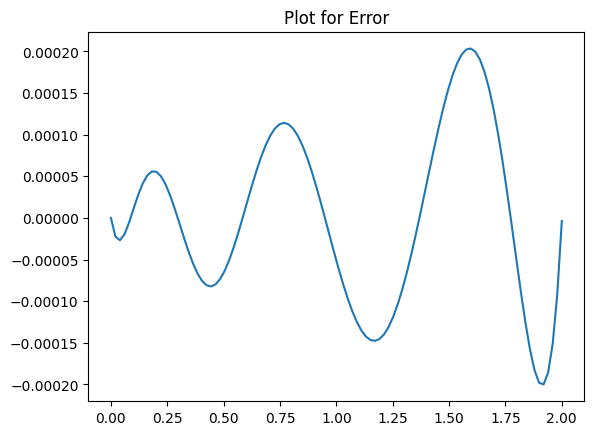

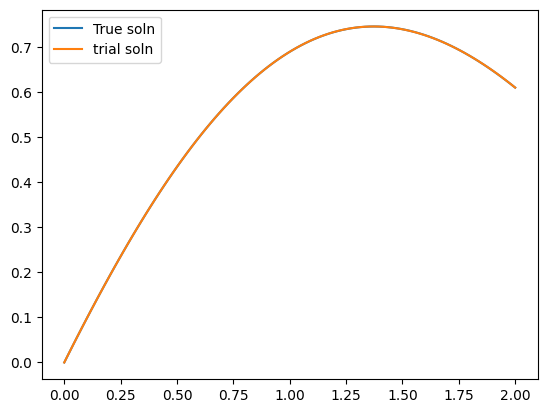

In [ ]:
x_test = np.linspace(0,2,100)


_, N = layer1NN(p2,x_test)
yt = x_test*N
ya = my_function2(x_test)



import matplotlib.pyplot as plt
plt.plot(x_test,( ya-yt).reshape(100,1))
plt.title('Plot for Error')
plt.show()

plt.plot(x_test,( ya),label = 'True soln')
plt.plot(x_test,( (yt).reshape(100,1)),label = 'trial soln')
plt.legend()


# **Finite Element Method**

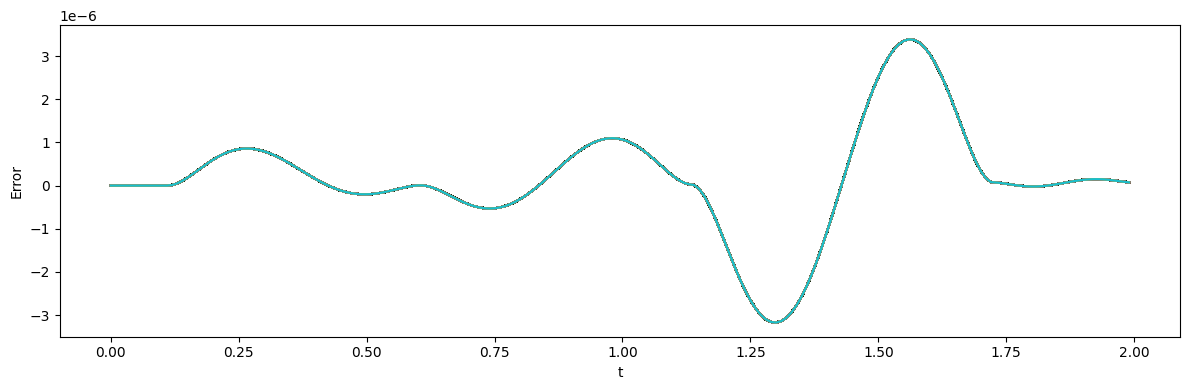

Mean time taken: 0.001658 seconds
Standard deviation: 0.001624 seconds


In [6]:

from scipy.integrate import solve_ivp
import time
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE function
F = lambda t, s: -s/5 + np.exp(-t/5)*np.cos(t)

# Set up the time evaluation points
t_eval = np.arange(0, 2, 0.01)

# Number of iterations to perform
num_iterations = 1000

# Arrays to store elapsed times and solutions
elapsed_times = np.zeros(num_iterations)
solutions = []

# Perform multiple iterations to measure time and store solutions
for i in range(num_iterations):
    start_time = time.time()

    sol = solve_ivp(F, [0, 2], [0], t_eval=t_eval, rtol=1e-6, atol=1e-6)

    end_time = time.time()
    elapsed_time = end_time - start_time

    elapsed_times[i] = elapsed_time
    solutions.append(sol.y[0])

# Plot the errors
plt.figure(figsize=(12, 4))
for i, solution in enumerate(solutions):
    plt.plot(sol.t, solution - np.exp(-sol.t/5)*np.sin(sol.t))

plt.xlabel('t')
plt.ylabel('Error')
# plt.legend()
plt.tight_layout()
plt.show()

# Print the mean and standard deviation of the elapsed times
print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")


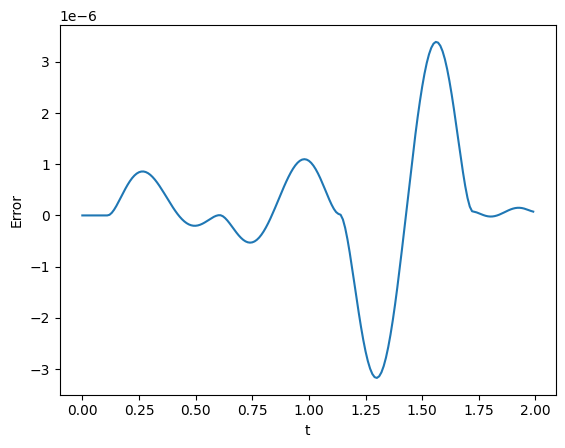

In [7]:
plt.plot(sol.t, solution - np.exp(-sol.t/5)*np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('Error')
# plt.legend()
# plt.tight_layout()
plt.show()

Error Plots for different Training points and Different Hidden units

In [ ]:
def error_min_train_hidd(neurons, train_points):
  # Training Points                                                               # Intial Values
  x_train = np.linspace(0,2,train_points)

  n_inputs = 1
  n_neurons = neurons
  p = np.random.randn(1,3*n_neurons)
  p =p[0]
  res = minimize(error2, p, method='BFGS', jac=grad2,args=(x_train), options={ 'disp': False})
  return res.x


In [ ]:
def plot_for_diff_hidd_units(list_neurons, train_points):
  x_test = np.linspace(0,2,100)
  for neurons in list_neurons:
    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(neurons, train_points)


      _, N = layer1NN(weights ,x_test)
      yi = x_test*N
      ysum += yi
    yt = ysum/run
    ya = my_function2(x_test)
    plt.plot(x_test,((ya - yt).reshape(100,1)),label = 'error for hidden units = {}'.format(neurons))
  plt.legend()
  plt.title('No. of Training points are {}'.format(train_points))
  plt.show()

In [ ]:
list_neuron = [10,15,20,30,40,80,100]
plot_for_diff_hidd_units(list_neuron, 10)

In [ ]:
list_neuron = [10,15,20,30,40,80,100]
plot_for_diff_hidd_units(list_neuron, 20)

In [ ]:
list_neuron = [10,15,20,30,40,80,100]
plot_for_diff_hidd_units(list_neuron, 30)

In [ ]:
list_neuron = [10,15,20,30,40,80,100]
plot_for_diff_hidd_units(list_neuron, 50)

In [ ]:
list_neuron = [10,15,20,30,40,80,100]
plot_for_diff_hidd_units(list_neuron, 70)

In [ ]:
list_neuron = [10,15,20,30,40,80,100]
plot_for_diff_hidd_units(list_neuron, 80)

In [ ]:
list_neuron = [10,15,20,30,40,80,100]
plot_for_diff_hidd_units(list_neuron, 100)

In [ ]:
for i in range(10,110,10):
  list_neuron = [30,60,85,100]
  plot_for_diff_hidd_units(list_neuron, i)

In [ ]:
for i in range(10,110,10):
  list_neuron = [35,55,65,85,95]
  plot_for_diff_hidd_units(list_neuron, i)

In [ ]:
  list_neuron = [6,9,69,96]
  plot_for_diff_hidd_units(list_neuron, 69)

In [ ]:
!pip install wandb

In [ ]:
import wandb
wandb.login(key='da5365b4335ad8c7a1df7f3653ec9d0b092e8b09')

In [ ]:
# You need to define a config file in the form of dictionary or yaml
sweep_config = {
    'method': 'grid',
    'name': 'sweep Hidden Units Training Datasets',
    'metric': {
        'name': 'Error',
        'goal': 'minimize'
    },
    'parameters': {
        'hiddenUnits': {
            'values': [i for i in range(10, 105, 5)]
        },
        'trainingPoints': {
            'values': [i for i in range(10, 110, 10)]
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='ANN_Proj_Ques_2')

In [ ]:
import wandb
import numpy as np
from scipy.optimize import minimize

def Error(config):
    hiddenUnits = config['hiddenUnits']
    trainingPoints = config['trainingPoints']
    x_test = np.linspace(0, 2, 100)

    ysum=0
    run = 20
    for i in range(run):
      weights = error_min_train_hidd(hiddenUnits, trainingPoints)


      _, N = layer1NN(weights ,x_test)
      yi = x_test*N
      ysum += yi
    yt = ysum/run
    ya = my_function2(x_test)
    err = np.linalg.norm(yt-ya)

    wandb.log({"Error": err})


In [ ]:
def main():
    '''
    WandB calls main function each time with different combination.

    We can retrieve the same and use the same values for our hyperparameters.
    '''
    with wandb.init() as run:
        run_name = "-Hidd_units" + str(wandb.config.hiddenUnits) + "-Train_points_" + str(wandb.config.trainingPoints)
        wandb.run.name = run_name
        #obj=NN(wandb.config['num_layers'],wandb.config['hidden_size'])

        Error(wandb.config)

wandb.agent(sweep_id, function=main)  # calls main function for count number of times.
wandb.finish()

In [ ]:
wandb.finish()

In [ ]:
def plot_error_variance(neurons, train_points):
  x_test = np.linspace(0,2,100)
  ya = my_function2(x_test)
  run = 20
  lst = []
  for i in range(20):
      weights = error_min_train_hidd(neurons, train_points)
      _, N = layer1NN(weights ,x_test)
      yi = x_test*N
      err = ((ya - yi).reshape(100,1))
      lst.append(err)
  lst = np.array(lst)
  mean_line = np.mean(lst, axis=0).reshape(100,)
  std_dev = np.std(lst, axis=0).reshape(100,)
  plt.plot(x_test, mean_line, color='blue', label='Mean')
  plt.fill_between(x_test, mean_line - std_dev, mean_line + std_dev, color='grey', alpha=0.5, label='Std Dev')
  plt.xlabel('X')
  plt.ylabel('Error')
  plt.title(f'Mean and Standard Deviation of 20 Error plots with Training points {train_points} and Hidden units {neurons}')
  plt.legend()
  plt.show()

In [ ]:
import time
def calc_time(nums, neurons, train_points):
  iter = nums
  elapsed_times = np.zeros(nums)
  for i in range(iter):
    start_time = time.time()
    weights = error_min_train_hidd(neurons, train_points)
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_times[i] = elapsed_time
  print(f"Mean time taken: {np.mean(elapsed_times):.6f} seconds")
  print(f"Standard deviation: {np.std(elapsed_times):.6f} seconds")


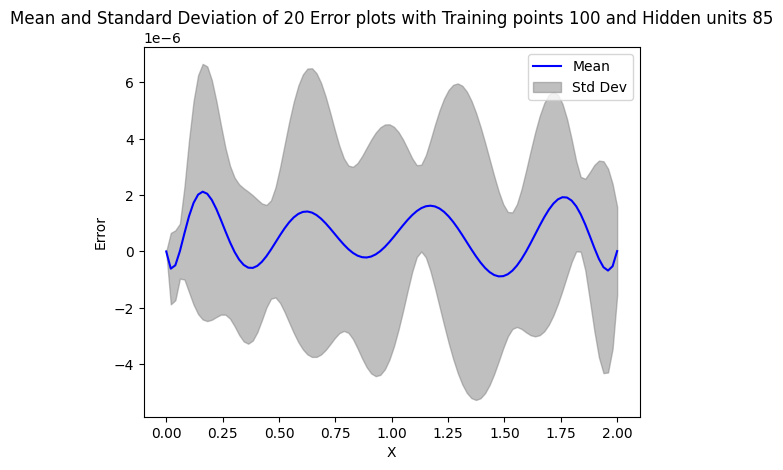

Mean time taken: 0.874376 seconds
Standard deviation: 0.638585 seconds


In [ ]:
plot_error_variance(85, 100)
calc_time(100,85, 100)

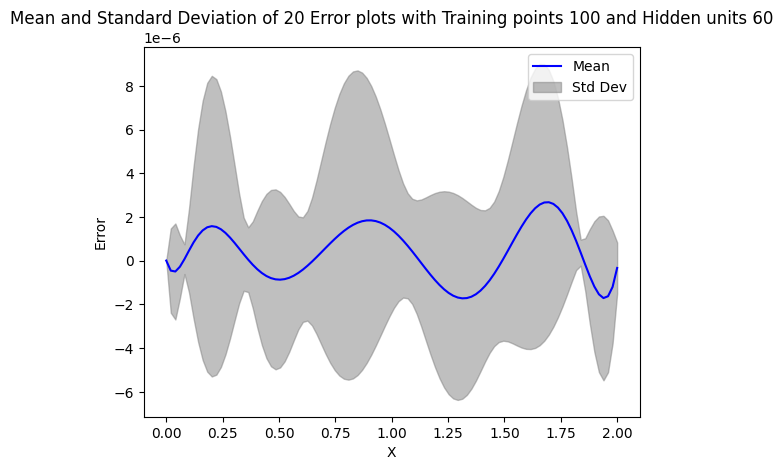

Mean time taken: 0.548392 seconds
Standard deviation: 0.364957 seconds


In [ ]:
plot_error_variance(60, 100)
calc_time(100,60, 100)

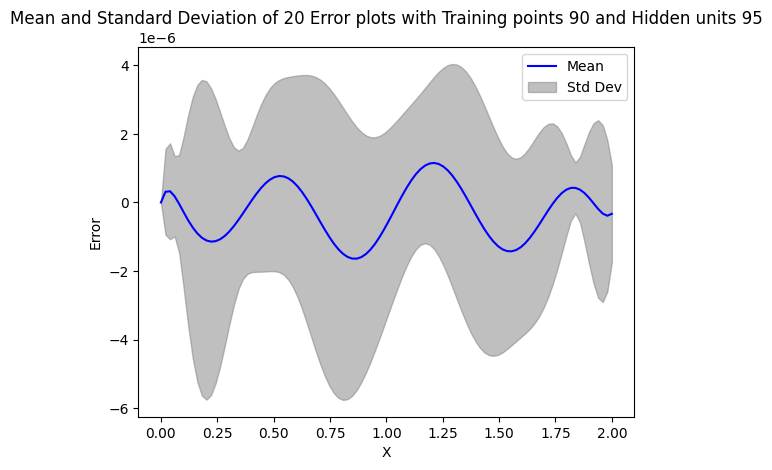

Mean time taken: 0.884956 seconds
Standard deviation: 0.467875 seconds


In [ ]:
plot_error_variance(95, 90)
calc_time(100,95, 90)

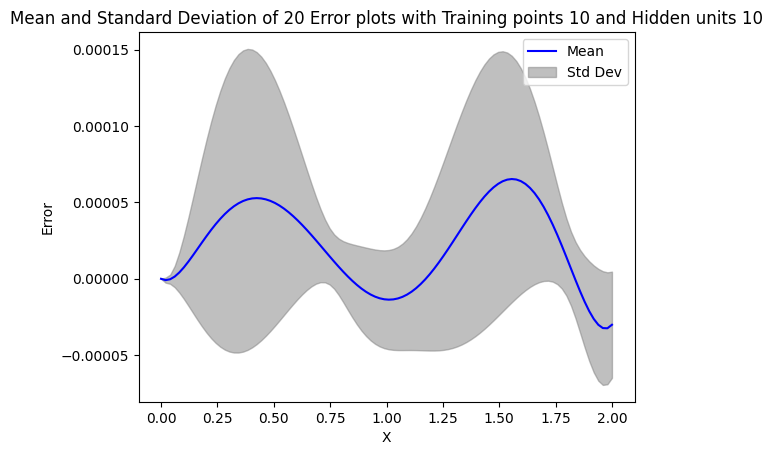

Mean time taken: 0.072410 seconds
Standard deviation: 0.063957 seconds


In [ ]:
plot_error_variance(10,10)
calc_time(100,10,10)